#### Apirileko Kontrol froaren azalpena

Erroen kokaeraren teknika erabiliz, bi PD kontrolagailu diseinatu dira, 
$PD(s)=0.12\frac{1+0.109s}{1+s/100}\quad\text{eta}\quad PD(s)=0.062\frac{1+1.198s}{1+s/100}$

hurrengo sistemarentzat: 

$G_{p}(s)={\displaystyle \frac{100(s+2.5)}{s(s+2)(s+3)}}$

H(s)=1 izanik. Diseinu espezifikazioak dira $\%R\leq\%20$, $T_{1}\leq0.5$ s. eta $T_{p}\leq1$ s., eta hurrengo poloak aukeratu dira begizta itxirako $s_{1}=-5\pm7j$.Hau eskatzen da:

(a) Bi diseinuak aztertzea eta bere zuzentasuna eztabaidatu.

(b) Aztertu espezifikazioak betetzen diren. Espezifikazioak ez badira betetzen, azaldu zergatia, kasu bakoitzean.

(c) Posible bada, doitu PD-ak hobetzeko espezifikazioen betetze maila. Eztabaidatu eta baloratu lortutako emaitza


##### Emaitza

Lehenago, datuak eta espezifikazion azterketa egiten da.


In [5]:
x=1


 x  = 
   1.


 g  = 
     250 +100s    
   -------------  
   6s +5s^2 +s^3  
 s1  = 
   0. + 0.i  -9.1189962 + 17.80011i


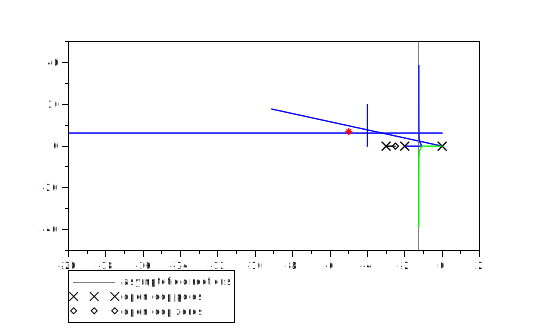

In [9]:
%plot inline
s=%s;

g=100*(s+2.5)/s/(s+3)/(s+2);g.dt='c'

// Desiratutako poloa
sd=-5+7*%i;

//Gaindiketa kte R=%20
R=20/100;
d=1/sqrt((%pi/log(R))^2+1);
wn=[0,20];
s1=(-d+sqrt(d^2-1))*wn

// Puntako denbora kte
T1=0.5;
wd=%pi/T1;
re=[0,20];
s2=-re+wd*%i;

// Egonkortze Puntako denbora kte
Tp=1;
dwn=4/Tp;
im=[0,20];
s3=-dwn+im*%i;

//Grafikoa

plot(real(s1),imag(s1))
plot(real(s2),imag(s2))
plot(real(s3),imag(s3))
plot(real(sd),imag(sd),'*r')
evans(g)

Emaitza ikusita ondorioztatzen da aukeratutako poloa egokia dela espezifikazioak betetzeko.

Bestalde, plantaren EK ez da pasatzen hurbil, berez zero bat sartzea (PD bat) egokia da adarrak erakartzeko.

Amaitzeko puntua ez dago oso hurrun jatorritik ere, eta ez da espero sistema gehiegi forzatzen ari garenik.

#### Diseinuen azterketa

Poloaren aukeraketa egokia dela ziurtatuta, orain bi kontrolagailuak sartuta EKak egiten dira, haien  diseinua baloratzeko.


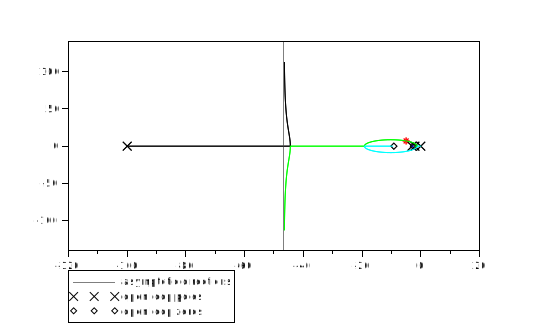

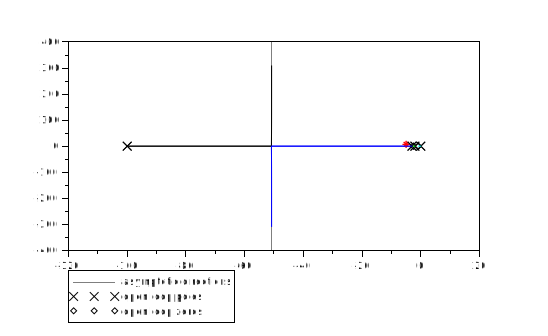

In [16]:
%plot inline
pd1= 0.12*(1 + 0.109*s)/(1 + s/100);

scf(1);
plot(real(sd),imag(sd),'*r')
evans(pd1*g)
scf(2);
pd2= 0.062*(1 +  1.198*s)/(1 + s/100);

plot(real(sd),imag(sd),'*r')
evans(pd2*g)

Zoom egiten ikusten da PD1 erabiliz EK pasatzen dela nahi den puntutik eta PD2 erabiliz ez. Hau da PD1 diseinu egokia da klaseko metodologia jarraituz eta PD2 ez.

##### Denbora erantzuna baloratu

Orain denbora erantzuna aztertu dezakegu. Zentrstu ahal dugu eztabaida PD1 kasuan, baina badaezpada PD2 ere kalkulatuko dut.

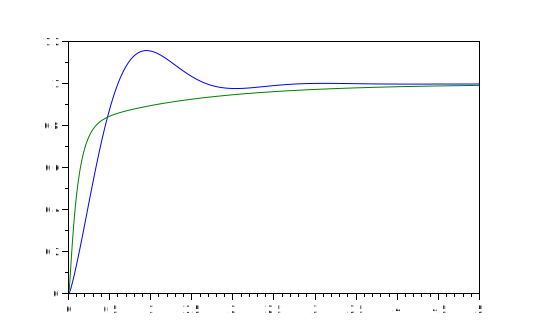

In [18]:
%plot inline
gitxia1=(pd1*g)/.(1);
gitxia2=(pd2*g)/.(1);

t=0:0.01:5;

y1=csim('step',t,gitxia1);
y2=csim('step',t,gitxia2);
plot(t,y1,t,y2)

Ikusten da nola PD2 erabiliz emaitza ez dela batera egokia, aurre ikusi dugun bezala.

Baina PD1 kasuan ere, espezifikazioak ez dira betetzen.

Aztertuko dugu gertatutakoa. Hasteko begizta itxiko poloen kokapena ikusiz.

In [19]:
roots(gitxia1.den)

 ans  =
  -98.76746  + 0.i       
  -1.8307489 + 2.9090193i
  -1.8307489 - 2.9090193i
  -2.5710417 + 0.i       


Argi eta garbi ez daude egon behar diren puntuan, $-5+7 j$ . Analisia EKn ere egin daiteke

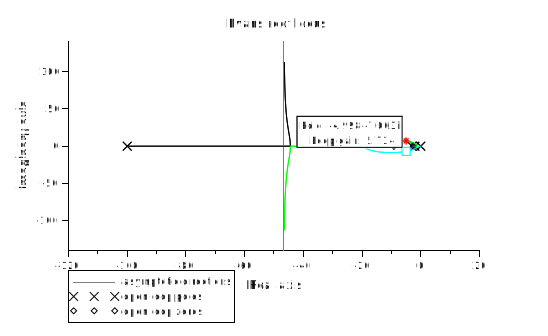

In [44]:
%plot inline
pd1= 0.12*(1 + 0.109*s)/(1 + s/100);

scf(1);

evans(pd1*g)
curve_handles=datatipGetEntities();

e=curve_handles(1);

plot(real(sd),imag(sd),'*r')
d1=datatipCreate(e(1),[-5,-7]);

EKn ikusten da $s_d$ puntuan behar den irabazia 5.73 dela, hau da, ez da 1. Horrek esan nahi du $K_p$ gaizki kalkulatuta dagoela.

Erabili dezakegu EKn lortutako balioa edo modulu baldintzaren bitartez birkalkulatu

In [48]:
Kp=1/abs(horner(pd1*g,sd))

 Kp  = 
   5.7336068


Baliol horrekin berriro lortzen da denbora erenuko irteera, diseinua baloratzeko berriro.


  -92.492861 + 0.i     
  -4.997446  + 7.00361i
  -4.997446  - 7.00361i
  -2.5122475 + 0.i     


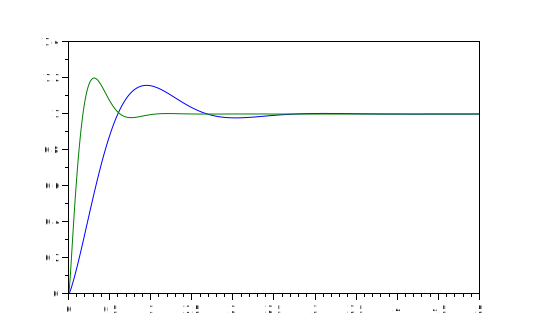

In [53]:
gitxia12=(Kp*pd1*g)/.(1);

y12=csim('step',t,gitxia12);
plot(t,y1,t,y12)
disp(roots(gitxia12.den))


Orain bai, diseinua nahiko egokia da eta begizta itxiko poloak desiratuak. 

Halere, againdiketa pixka bat gehiago doitu daiteke, ez izateko %20 doi-doi.

EKn ikusten da nola irabazi proportzionala handituz agindiketa hobetu daitekeela, sistema motelagoa egin gabe.

Adibidez

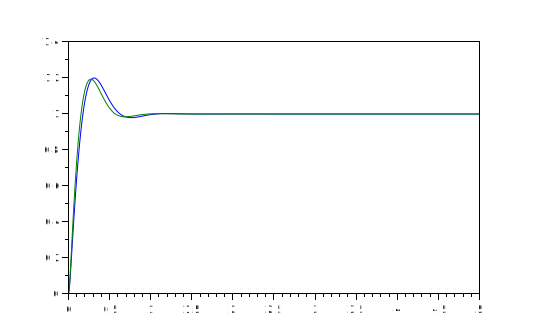

In [51]:
gitxia13=(7*pd1*g)/.(1);
y13=csim('step',t,gitxia13);
plot(t,y12,t,y13)

Ikusten da lortzen dela zertxo bat hobetzea.

Amaitzeko kontrol seinalea baloratu daiteke

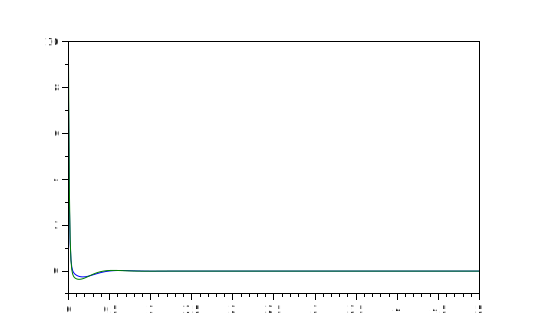

In [55]:
uitxia12=(Kp*pd1)/.(g);
uitxia13=(7*pd1)/.(g);

u1=csim('step',t,uitxia12);
u2=csim('step',t,uitxia13);

plot(t,u1,t,u2)

Azpimarratu behar da PD guztiak kausalak direla (polo bat gehitu da horretarako). Horrela izanik, u-ren tranaferentzi funtzioak ondo definituta daude \it csim komandua erabiltzeko.

Kontrol seinaleak baloratuz, biak antzekoak dira eta ez dirudite handiegiak, saturazioarekin arazorik izateko (hori bai, aplikazioa ezagutu gabe)

Halere, hasierako denbora pasata, kontrol seinalea txiak egiten da ($K_p=5.73$ denean gehiago) eta zona hildakoarekin arazoak egon litezke. Aplikazioa baloratu beharko zen ondo zehazteko dauden muga fisikoak.